In [ ]:
import os
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from ultralytics import YOLO
from PIL import Image

model = YOLO(r"C:\Users\dunli\Documents\STSY-project-main\Training_Code\runs\detect\train13\weights\best.pt").cuda()

test_images_dir = r"C:\Users\dunli\Documents\STSY-project-main\Training Data\Original Data\test_images"

if not os.path.exists(test_images_dir):
    raise FileNotFoundError(f"The directory '{test_images_dir}' does not exist.")

ground_truth_labels = []
predicted_labels = []

desired_size = (800, 600)  

start_time = time.time()

for image_file in os.listdir(test_images_dir):
    image_path = os.path.join(test_images_dir, image_file)
    results = model(image_path)
    img = Image.open(image_path)
    img_resized = img.resize(desired_size, Image.ANTIALIAS)
    plt.figure(figsize=(4, 4))
    plt.imshow(img_resized)
    plt.axis('on')

    # Extract ground truth labels from the file name (assuming the file name contains the label)
    ground_truth_label = image_file.split("_")[0]  # Extracting label from file name
    ground_truth_labels.append(ground_truth_label)

    if len(results[0].boxes) > 0:
        predicted_label = results[0].names[0]
        for box in results[0].boxes:
            x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()
            scale_x = desired_size[0] / img.width
            scale_y = desired_size[1] / img.height
            x1 *= scale_x
            y1 *= scale_y
            x2 *= scale_x
            y2 *= scale_y
            label = results[0].names[box.cls.cpu().numpy()[0].astype(int)]
            plt.gca().add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, edgecolor='red', facecolor='none', linewidth=2))
            plt.text(x1, y1, label, fontsize=12, color='white', bbox=dict(facecolor='red', edgecolor='none', pad=1))
    else:
        predicted_label = "None"

    predicted_labels.append(predicted_label)

    plt.show()

accuracy = accuracy_score(ground_truth_labels, predicted_labels)

processing_time = time.time() - start_time

print("Accuracy:", accuracy)
print("Processing Time:", processing_time, "seconds")

In [5]:
import os
import time
import numpy as np
from sklearn.metrics import accuracy_score
from ultralytics import YOLO

# Load the trained model (replace "best_model.pt" with the path to your best model's weights)
model = YOLO(r"C:\Users\dunli\Documents\STSY-project-main\Training_Code\runs\detect\train13\weights\best.pt").cuda()

# Path to test images directory
test_images_dir = r"C:\Users\dunli\Documents\STSY-project-main\Training Data\Original Data\test_images"

# Output directory for processed images
output_dir = r"C:\Users\dunli\Documents\STSY-project-main\Training Data\processed_image"

# Check if the directory exists, if not, create it
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Check if the test images directory exists
if not os.path.exists(test_images_dir):
    raise FileNotFoundError(f"The directory '{test_images_dir}' does not exist.")

# Initialize lists to store ground truth labels and predicted labels
ground_truth_labels = []
predicted_labels = []

# Measure processing time
start_time = time.time()

# Iterate through each image in the test directory
for image_file in os.listdir(test_images_dir):
    image_path = os.path.join(test_images_dir, image_file)
    # Perform inference on the image
    results = model(image_path)
    # Iterate through each result
    for result in results:
        # Save the processed image to the output directory
        output_image_path = os.path.join(output_dir, image_file)
        result.save(output_image_path)
        
        # Comment: Open this image in VS Code manually to view it.
        # To do this: Go to the Explorer view, find the 'tested_image' directory, and click on the image.

        # Extract ground truth labels from the file name (assuming the file name contains the label)
        ground_truth_label = image_file.split("_")[0]  # Extracting label from file name
        ground_truth_labels.append(ground_truth_label)
        # Extract predicted label from the result
        predicted_label = result.names[0] if len(result.boxes) > 0 else "None"
        predicted_labels.append(predicted_label)

# Calculate accuracy
accuracy = accuracy_score(ground_truth_labels, predicted_labels)

# Calculate processing time
processing_time = time.time() - start_time

# Print accuracy and processing time
print("Accuracy:", accuracy)
print("Processing Time:", processing_time, "seconds")




image 1/1 C:\Users\dunli\Documents\STSY-project-main\Training Data\Original Data\test_images\pos_4_frame_15_1.png: 640x640 8 rods, 1 microcolony, 25.5ms
Speed: 2.2ms preprocess, 25.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 C:\Users\dunli\Documents\STSY-project-main\Training Data\Original Data\test_images\pos_4_frame_15_2.png: 640x640 16 rods, 26.0ms
Speed: 2.7ms preprocess, 26.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 C:\Users\dunli\Documents\STSY-project-main\Training Data\Original Data\test_images\pos_4_frame_15_3.png: 640x640 18 rods, 2 microcolonys, 24.4ms
Speed: 2.3ms preprocess, 24.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 C:\Users\dunli\Documents\STSY-project-main\Training Data\Original Data\test_images\pos_4_frame_15_4.png: 640x640 11 rods, 24.0ms
Speed: 3.1ms preprocess, 24.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 C:\Users\du


image 1/1 C:\Users\dunli\Documents\STSY-project-main\Training Data\Original Data\test_images\pos_4_frame_15_1.png: 640x640 8 rods, 1 microcolony, 25.4ms
Speed: 2.2ms preprocess, 25.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


C:\Users\dunli\AppData\Local\Temp\ipykernel_28256\3735530106.py:27: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img_resized = img.resize(desired_size, Image.ANTIALIAS)


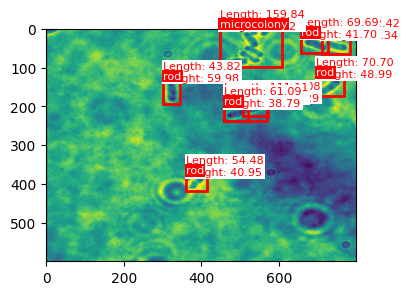


image 1/1 C:\Users\dunli\Documents\STSY-project-main\Training Data\Original Data\test_images\pos_4_frame_15_2.png: 640x640 16 rods, 27.8ms
Speed: 2.7ms preprocess, 27.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


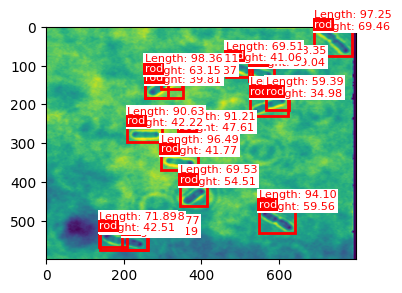


image 1/1 C:\Users\dunli\Documents\STSY-project-main\Training Data\Original Data\test_images\pos_4_frame_15_3.png: 640x640 18 rods, 2 microcolonys, 27.9ms
Speed: 2.7ms preprocess, 27.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


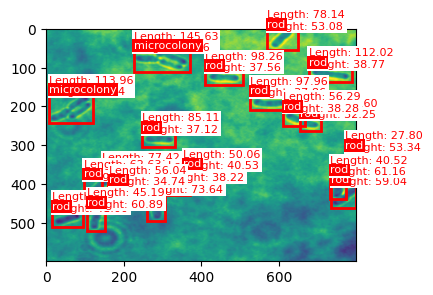


image 1/1 C:\Users\dunli\Documents\STSY-project-main\Training Data\Original Data\test_images\pos_4_frame_15_4.png: 640x640 11 rods, 28.3ms
Speed: 1.7ms preprocess, 28.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


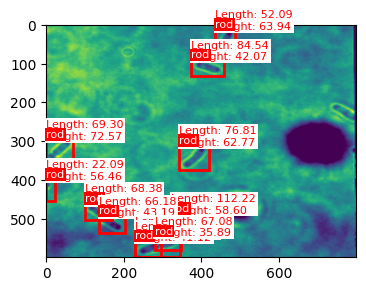


image 1/1 C:\Users\dunli\Documents\STSY-project-main\Training Data\Original Data\test_images\pos_4_frame_55_1.png: 640x640 9 rods, 4 microcolonys, 26.5ms
Speed: 2.9ms preprocess, 26.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


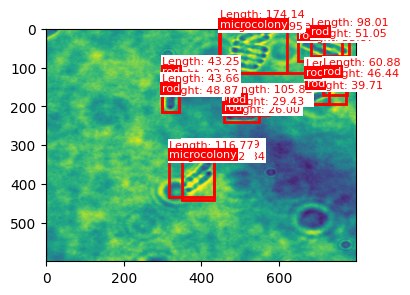


image 1/1 C:\Users\dunli\Documents\STSY-project-main\Training Data\Original Data\test_images\pos_4_frame_55_2.png: 640x640 20 rods, 27.6ms
Speed: 2.2ms preprocess, 27.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


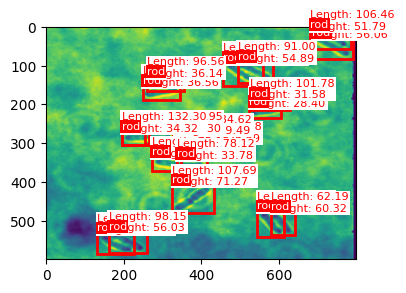


image 1/1 C:\Users\dunli\Documents\STSY-project-main\Training Data\Original Data\test_images\pos_4_frame_55_3.png: 640x640 14 rods, 4 microcolonys, 27.8ms
Speed: 2.7ms preprocess, 27.8ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


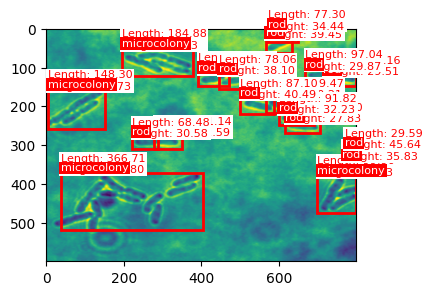


image 1/1 C:\Users\dunli\Documents\STSY-project-main\Training Data\Original Data\test_images\pos_4_frame_55_4.png: 640x640 14 rods, 27.6ms
Speed: 2.5ms preprocess, 27.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


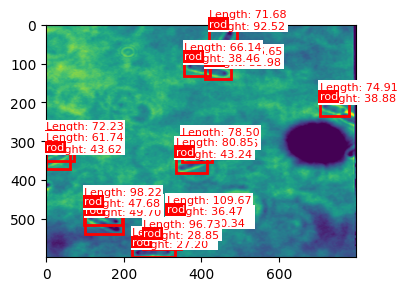


image 1/1 C:\Users\dunli\Documents\STSY-project-main\Training Data\Original Data\test_images\pos_4_frame_80_1.png: 640x640 6 rods, 5 microcolonys, 27.9ms
Speed: 2.7ms preprocess, 27.9ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)


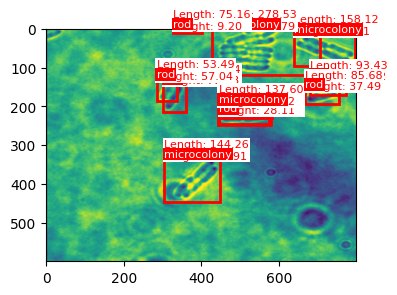


image 1/1 C:\Users\dunli\Documents\STSY-project-main\Training Data\Original Data\test_images\pos_4_frame_80_2.png: 640x640 4 rods, 7 microcolonys, 27.7ms
Speed: 2.1ms preprocess, 27.7ms inference, 6.2ms postprocess per image at shape (1, 3, 640, 640)


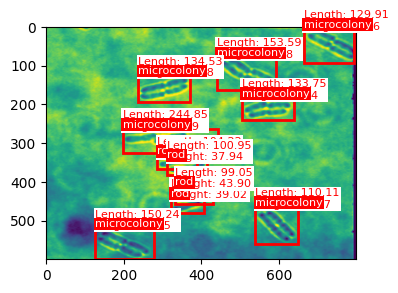


image 1/1 C:\Users\dunli\Documents\STSY-project-main\Training Data\Original Data\test_images\pos_4_frame_80_3.png: 640x640 6 rods, 6 microcolonys, 28.2ms
Speed: 2.6ms preprocess, 28.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


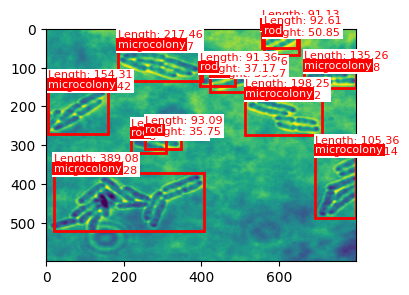


image 1/1 C:\Users\dunli\Documents\STSY-project-main\Training Data\Original Data\test_images\pos_4_frame_80_4.png: 640x640 2 rods, 4 microcolonys, 26.6ms
Speed: 2.8ms preprocess, 26.6ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


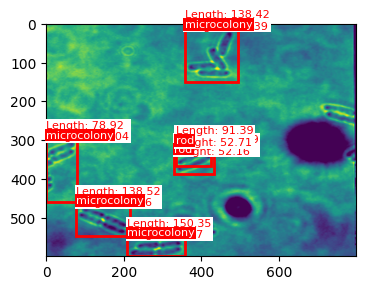


image 1/1 C:\Users\dunli\Documents\STSY-project-main\Training Data\Original Data\test_images\pos_4_fr_1_1.png: 640x640 7 rods, 1 microcolony, 26.7ms
Speed: 3.2ms preprocess, 26.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


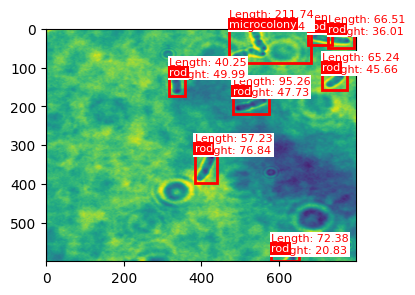


image 1/1 C:\Users\dunli\Documents\STSY-project-main\Training Data\Original Data\test_images\pos_4_fr_1_2.png: 640x640 12 rods, 26.3ms
Speed: 3.3ms preprocess, 26.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


KeyboardInterrupt: 

In [16]:
import os
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from ultralytics import YOLO
from PIL import Image

model = YOLO(r"C:\Users\dunli\Documents\STSY-project-main\Training_Code\runs\detect\train13\weights\best.pt").cuda()

test_images_dir = r"C:\Users\dunli\Documents\STSY-project-main\Training Data\Original Data\test_images"

if not os.path.exists(test_images_dir):
    raise FileNotFoundError(f"The directory '{test_images_dir}' does not exist.")

ground_truth_labels = []
predicted_labels = []

desired_size = (800, 600)  

start_time = time.time()

for image_file in os.listdir(test_images_dir):
    image_path = os.path.join(test_images_dir, image_file)
    results = model(image_path)
    img = Image.open(image_path)
    img_resized = img.resize(desired_size, Image.ANTIALIAS)
    plt.figure(figsize=(4, 4))
    plt.imshow(img_resized)
    plt.axis('on')

    # Extract ground truth labels from the file name (assuming the file name contains the label)
    ground_truth_label = image_file.split("_")[0]  # Extracting label from file name
    ground_truth_labels.append(ground_truth_label)

    if len(results[0].boxes) > 0:
        predicted_label = results[0].names[0]
        for box in results[0].boxes:
            x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()
            scale_x = desired_size[0] / img.width
            scale_y = desired_size[1] / img.height
            x1 *= scale_x
            y1 *= scale_y
            x2 *= scale_x
            y2 *= scale_y
            label = results[0].names[box.cls.cpu().numpy()[0].astype(int)]
            plt.gca().add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, edgecolor='red', facecolor='none', linewidth=2))
            
            # Calculate length and height of bounding box
            length = x2 - x1
            height = y2 - y1
            text = f"Length: {length:.2f}\nHeight: {height:.2f}"
            plt.text(x1, y1, text, fontsize=8, color='red', bbox=dict(facecolor='white', edgecolor='none', pad=1))
            plt.text(x1, y1 - 5, label, fontsize=8, color='white', bbox=dict(facecolor='red', edgecolor='none', pad=1))

    else:
        predicted_label = "None"

    predicted_labels.append(predicted_label)

    plt.show()

accuracy = accuracy_score(ground_truth_labels, predicted_labels)

processing_time = time.time() - start_time

print("Accuracy:", accuracy)
print("Processing Time:", processing_time, "seconds")
